In [79]:
import librosa
import numpy as np
import matplotlib.pylab as plt
y, sr = librosa.load("speech1.wav") # Loading the Audio File
sr

22050

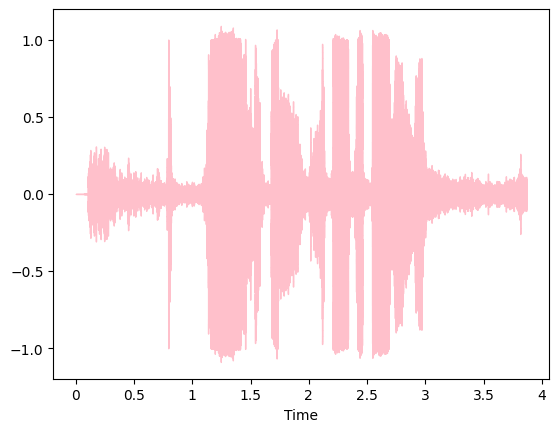

In [80]:
librosa.display.waveshow(y,color='pink') #Displaying the Audio Track

In [81]:
#A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. 
fft=np.fft.fft(y)
fft

array([ 233.30928652-8.88178420e-15j, -120.87790533-2.23615605e+02j,
       -155.80314246+1.91852809e+02j, ...,  309.02044945-1.26316953e+02j,
       -155.80314246-1.91852809e+02j, -120.87790533+2.23615605e+02j])

In [82]:
amplitude = np.abs(fft)
amplitude

array([233.30928652, 254.19560705, 247.14797115, ..., 333.84069662,
       247.14797115, 254.19560705])

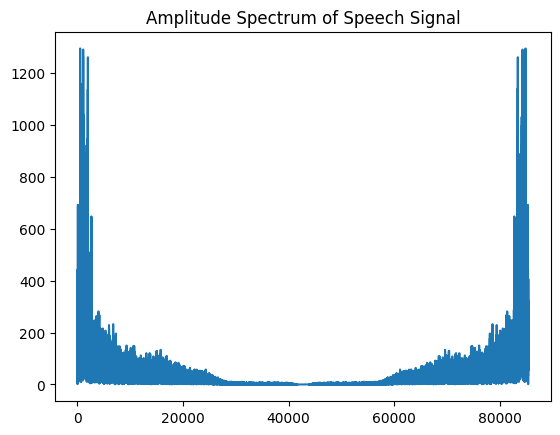

In [83]:
#Please plot the amplitude part of the spectral components and observe it.
plt.plot(amplitude)
plt.title('Amplitude Spectrum of Speech Signal')
plt.show()

In [84]:
#A2 Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal
#from frequency domain to time domain.
ifft=np.fft.ifft(fft)
ifft

array([ 9.02056208e-17+1.66533454e-16j, -1.52654644e-16-2.77611928e-17j,
       -1.11038642e-16+1.11005960e-16j, ...,
       -2.04522479e-02-4.27717757e-16j, -2.39101760e-02+2.69720701e-17j,
       -1.80115663e-02+5.49435333e-17j])

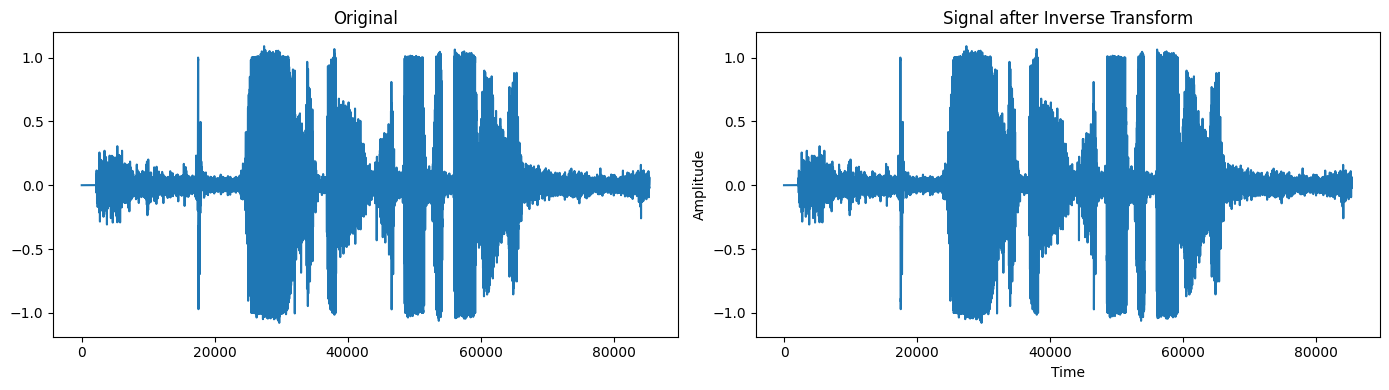

In [85]:
#Compare the generated time domain signal with the original signal.
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot(y)
plt.title('Original')
# Signal obtained after inverse transform
plt.subplot(1, 2, 2)
plt.plot(ifft)
plt.title('Signal after Inverse Transform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [86]:
from IPython.display import Audio
Audio(data=ifft, rate=sr)

In [87]:
#A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.
len(y)

85378

In [88]:
intervals = librosa.effects.split(y,top_db=10)
intervals

array([[24576, 32768],
       [33280, 35328],
       [36864, 40960],
       [48128, 62464],
       [64000, 66048]])

In [89]:
import IPython.display as ipd
#Listen to the generated signals after splitting
print(f"Split Audio with top_db={10}:")
for i, j in enumerate(intervals):
 split_audio = y[j[0]:j[1]]
 ipd.display(ipd.Audio(split_audio, rate=sr))
# Limit the number of intervals to play for clarity
 if i >= 5:
            break

Split Audio with top_db=10:


In [90]:
word=y[24576:32768]
Audio(data=word, rate=sr)

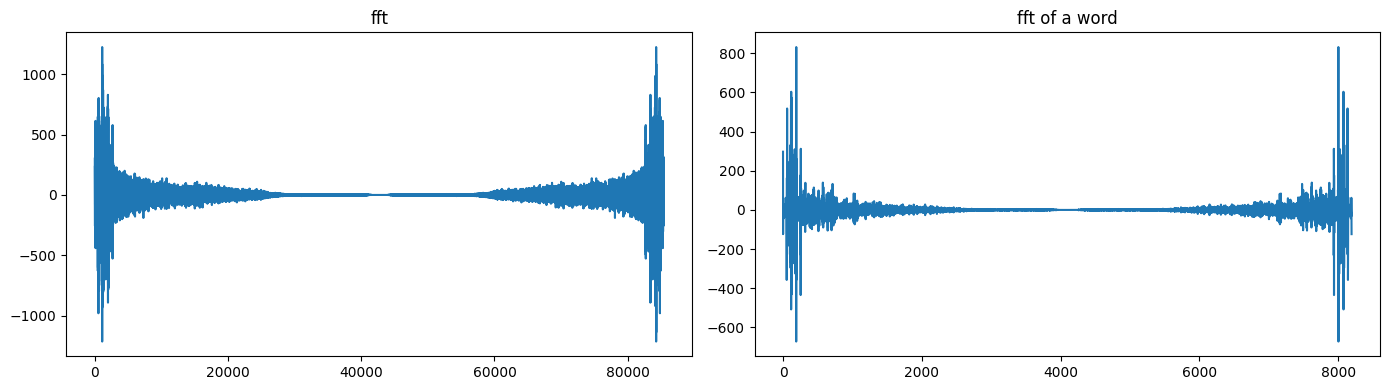

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot((fft))
plt.title('fft')
# Signal obtained after inverse transform
plt.subplot(1, 2, 2)
plt.plot((np.fft.fft(word)))
plt.title('fft of a word')
plt.tight_layout()
plt.show()

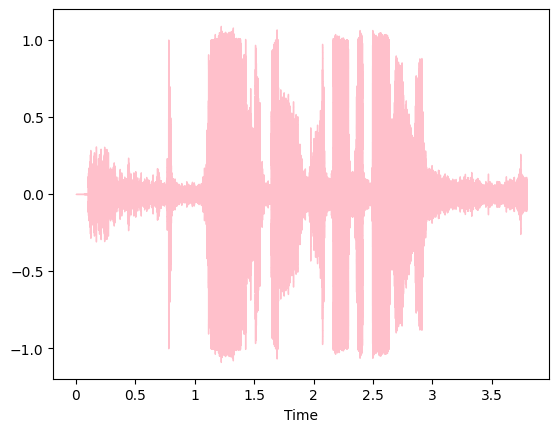

In [92]:
#A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.
librosa.display.waveshow(y,color='pink',sr=22500) 
Audio(data=y,rate=22500)

In [93]:
y_22500,r = librosa.load('speech1.wav',sr = 22500)
Audio(y_22500,rate = r)

In [94]:
window_length =int(r * 0.02)
window_length

450

In [95]:
fft_2 = np.fft.fft(y_22500[48128:48578])
Audio(fft_2,rate=r)

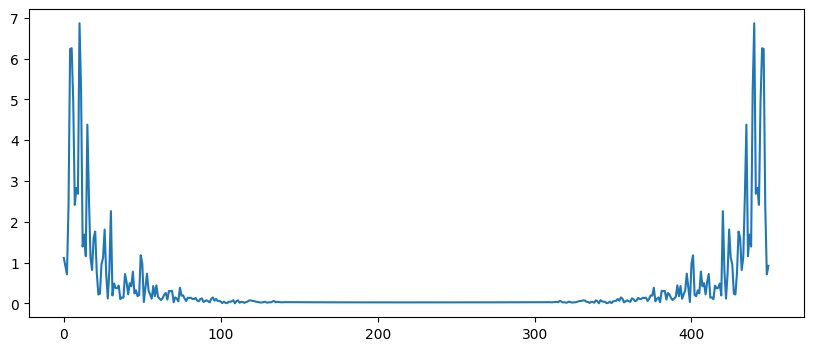

In [96]:
plt.figure(figsize=(10,4))
plt.plot(abs(fft_2))

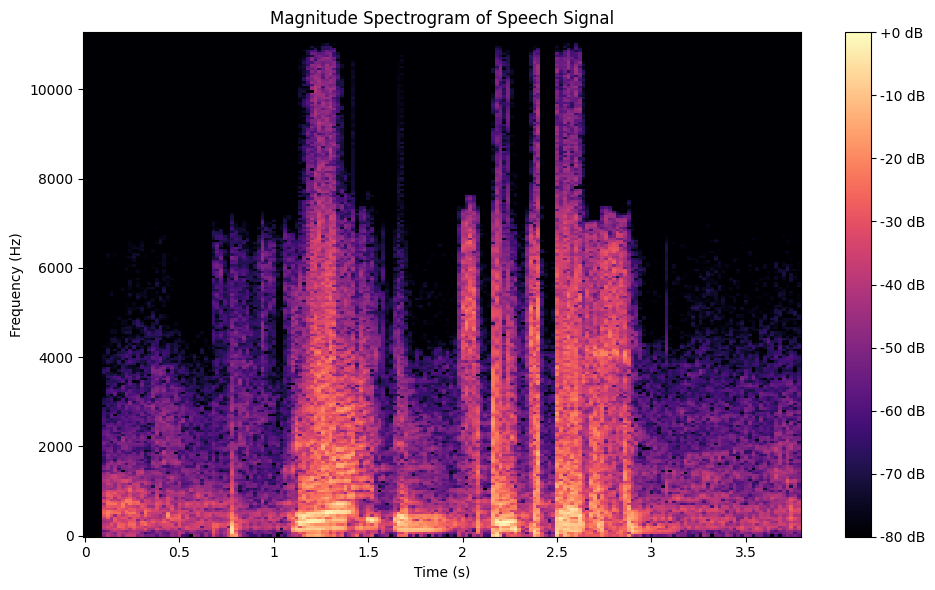

In [97]:
#A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency
#components using numpy.fft.rfft(). Stack these frequency components as columns in a
#matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or
#scipy.signal.stft() as well to achieve this

hop_size = int(0.02 *sr / 2)
stft_matrix = librosa.stft(y, n_fft=window_length, hop_length=window_length)

# Convert complex spectrogram to magnitude spectrogram
magnitude_stft = np.abs(stft_matrix)
# Plot the magnitude spectrogram as a heatmap
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(magnitude_stft, ref=np.max), sr=r, hop_length=window_length, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

C:\Users\duvar\AppData\Local\Temp\ipykernel_27412\3761995490.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')


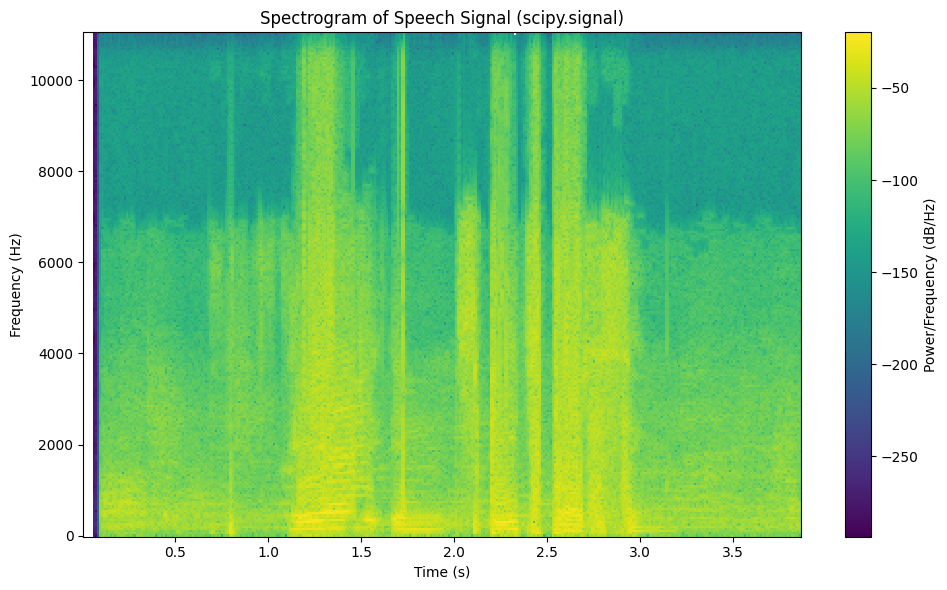

In [98]:
#A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.
from scipy.signal import spectrogram
frequencies, times, spectrogram_data = spectrogram(y, fs=sr, nperseg=window_length, noverlap=hop_size)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram of Speech Signal (scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()